# POI DATA processing

In [2]:
import pandas as pd

In [ ]:
# read POI data
df = pd.read_csv("shanghai_yangpu.csv")  

# Preview listings
print(df.columns)

# Note: The POI data used in this code contains Chinese characters, so some variable names or data content will appear in Chinese.
# To facilitate understanding, I have used English comments at the corresponding locations.

Index(['id', 'name', 'address', 'type', 'typecode', 'pcode', 'pname',
       'citycode', 'cityname', 'adcode', 'adname', 'business_area', 'location',
       'tel', 'bigType', 'midType', 'smallType', 'gcj_lng', 'gcj_lat',
       'wgs84_loc', 'wgs84Lng', 'wgs84Lat', 'geometry'],
      dtype='object')


In [5]:
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
#   Creating geometry fields
df = df.dropna(subset=['wgs84Lng', 'wgs84Lat'])  # Remove data with null coordinates
geometry = [Point(xy) for xy in zip(df['wgs84Lng'], df['wgs84Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

In [ ]:
#  DataFrame is df or gdf
df_siping = df[df['business_area'].str.contains('四平路', na=False) | df['adname'].str.contains('四平路', na=False)]  # The English word for 四平路 is Sipinglu Street.

# View the first few lines of the extraction result
print(df_siping.head())
print(f"共提取 {len(df_siping)} 条四平路街道POI记录") # print(f ‘A total of {len(df_siping)} Sipinglu  Street POI records were extracted’) 

            id                   name                  address  \
0   B00155QWTP   上海农商银行24小时自助银行(杨浦支行)       黄兴路1599号新纪元国际广场F1层   
4   B0FFJ8YQ6I              华联超市(四平店)  国年路95号(国权路地铁站4号口步行380米)   
29  B0FFFFPRND  LaBamba拉芭玛墨西哥餐吧(五角场店)       国定路333号3号湾广场2层223号   
49  B0FFH181L1          日本料理(同济联合广场店)          彰武路42号同济联合广场F2层   
55  B0JDPDWSZ1              东隧道股份有限公司                 辽源西路114号   

                      type typecode   pcode pname  citycode cityname  adcode  \
0   金融保险服务;自动提款机;上海农商银行ATM   160347  310000   上海市        21      上海市  310110   
4           购物服务;超级市场;上海华联   060405  310000   上海市        21      上海市  310110   
29          餐饮服务;外国餐厅;墨西哥菜   050216  310000   上海市        21      上海市  310110   
49            餐饮服务;中餐厅;中餐厅   050100  310000   上海市        21      上海市  310110   
55              公司企业;公司;公司   170200  310000   上海市        21      上海市  310110   

    ...           tel bigType midType  smallType     gcj_lng    gcj_lat  \
0   ...            []  金融保险服务   自动提款机  上海农商银行AT

Total 4392 Sipinglu Street POI records have been retrieved.

In [9]:
df_siping.to_csv("siping_poi.csv", index=False)

In [ ]:
# Six Function Mapping Dictionary
function_map = {
    '商业住宅': '居住', #  'Commercial Residential': 'Habitation', 
    '公司企业': '就业', #  'Corporate Enterprises': 'Employment', 
    '科教文化服务': '教育', #  'Scientific, Educational and Cultural Services': 'Education', 
    '餐饮服务': '商业', #  'Food and Beverage Services': 'Commerce', 
    '购物服务': '商业', #  'Shopping Services': 'Commerce', 
    '生活服务': '商业', #  'Amenity Services': 'Commerce', 
    '金融保险服务': '商业', # 'Financial and Insurance Services': 'Commerce', 
    '风景名胜': '休闲娱乐', #  'Scenic Spots': 'Recreation', 
    '体育休闲服务': '休闲娱乐', #  'Sports and Recreation Services': 'Recreation', 
    '住宿服务': '休闲娱乐', #  'Accommodation Services': 'Recreation ', 
    '公共设施': '休闲娱乐', # 'Public Facilities': 'Recreation', 
    '医疗保险服务': '医疗', # 'Health Insurance Services': 'Healthcare', 
    '政府机构以及社会团体': '就业', #  'Government Institutions as well as Social Organisations': 'Employment', 
    '交通设施服务': '交通设施', #  'Transportation Facilities Services': 'Transportation Facilities', 
    '摩托车服务': '商业', #  'Motorcycle Services': 'Commerce', 
    '汽车服务': '商业', #  'Automobile Services': 'Commerce', 
    '汽车维修': '商业', #  'Automobile Repair': 'Commerce', 
    '汽车销售': '商业', #  'Automobile Sales': 'Commerce', 
    '通行设施': '通行设施', #  'Access Facilities ': 'Access Facilities', 
    '地名地址信息': '其他', #  ' Place Name Address Information': ‘Other’,'
}

In [ ]:
# Add a new column function_type to sort by bigType
df_siping['function_type'] = df_siping['bigType'].map(function_map)

/tmp/ipykernel_22068/356781504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siping['function_type'] = df_siping['bigType'].map(function_map)


In [ ]:
# Check the number of POIs for each feature type
print(df_siping['function_type'].value_counts(dropna=False))

function_type
商业      1409
其他      1133
NaN      496
教育       355
就业       302
交通设施     262
通行设施     218
休闲娱乐     217
Name: count, dtype: int64


function_type 
Commerce 1409 
Other 1133 
NaN 496 
Education 355 
Employment 302 
Transport 262 
Access 218 
Recreation 217 
Name: count, dtype: int64

In [ ]:
# Check the bigType value of a record with a function_type of NaN.
unmapped_types = df_siping[df_siping['function_type'].isna()]['bigType'].unique()
print(unmapped_types)

['医疗保健服务' '商务住宅' '政府机构及社会团体']


[“Healthcare services” 'Business residential' “Government agencies and social organisations”]

In [ ]:
function_map.update({
    '医疗保健服务': '医疗', # 'Healthcare Services': 'Healthcare', 
    '商务住宅': '居住', #  'Business Residential': 'Habitation', 
    '政府机构及社会团体': '就业' # 'Government Institutions & Social Organisations': 'Employment'
})

In [15]:
df_siping['function_type'] = df_siping['bigType'].map(function_map)

/tmp/ipykernel_22068/1804067459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siping['function_type'] = df_siping['bigType'].map(function_map)


In [16]:
print(df_siping['function_type'].isna().sum())

0


In [ ]:
# Count the number of POIs for each feature type
function_counts = df_siping['function_type'].value_counts()

In [ ]:
# Print results
print(function_counts)

function_type
商业      1409
其他      1133
就业       439
教育       355
交通设施     262
居住       252
通行设施     218
休闲娱乐     217
医疗       107
Name: count, dtype: int64


function_type 
Commerce 1409 
Other 1133 
Employment 439 
Education 355 
Transport 262 
Habitation 252 
Access 218 
Recreation 217 
Healthcare 107 
Name: count, dtype: int64

In [ ]:
import os

# Six Function Types
function_types = ['居住', '就业', '商业', '医疗', '教育', '休闲娱乐'] # [‘Habitation’, ‘Employment’, ‘Commerce’, ‘Healthcare’, ‘Education’, ‘Recreation’]

# Creating an export directory
output_dir = "poi_by_function"
os.makedirs(output_dir, exist_ok=True)

# Export each type of function as a separate file
for ftype in function_types:
    subset = df_siping[df_siping["function_type"] == ftype]
    file_path = os.path.join(output_dir, f"siping_{ftype}.csv")
    subset.to_csv(file_path, index=False)
    print(f"{ftype} 导出为: {file_path}") # print(f‘{ftype} Export as: {file_path}’)

居住 导出为: poi_by_function/siping_居住.csv
就业 导出为: poi_by_function/siping_就业.csv
商业 导出为: poi_by_function/siping_商业.csv
医疗 导出为: poi_by_function/siping_医疗.csv
教育 导出为: poi_by_function/siping_教育.csv
休闲娱乐 导出为: poi_by_function/siping_休闲娱乐.csv


Habitation Export as: poi_by_function/siping_Habitation.csv 
Employment Export as: poi_by_function/siping_Employment.csv 
Commerce Export as: poi_by_function/siping_Commerce.csv 
Healthcare Export as: poi_by_function/ siping_Healthcare.csv 
Education Export as: poi_by_function/siping_Education.csv 
Recreation Export as: poi_by_function/siping_Recreation.csv

In [ ]:
# Category of features to be additionally exported
extra_function_types = ['交通设施', '通行设施', '其他'] # [“Transport facilities”, “Access facilities”, “Other”]

# Make sure the output directory still exists
output_dir = "poi_by_function"

# Export each type of function as a separate file
for ftype in extra_function_types:
    subset = df_siping[df_siping["function_type"] == ftype]
    file_path = os.path.join(output_dir, f"siping_{ftype}.csv")
    subset.to_csv(file_path, index=False)
    print(f"{ftype} 导出为: {file_path}") # print(f‘{ftype} Export as: {file_path}’)

交通设施 导出为: poi_by_function/siping_交通设施.csv
通行设施 导出为: poi_by_function/siping_通行设施.csv
其他 导出为: poi_by_function/siping_其他.csv


Transport facilities Exported as: poi_by_function/siping_transport_facilities.csv 
Passage facilities Exported as: poi_by_function/siping_passage_facilities.csv 
Other Exported as: poi_by_function/siping_other.csv

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import os

# Setting the save path
geojson_output_dir = "geojson_by_function"
os.makedirs(geojson_output_dir, exist_ok=True)

# Make sure you're using the Four Flat Streets subset
df = df_siping.copy()

# Generate geometry columns with gcj coordinates (gcj_lng for longitude, gcj_lat for latitude)
df["geometry"] = df.apply(lambda row: Point(row["gcj_lng"], row["gcj_lat"]), axis=1)

# Convert to GeoDataFrame, set geographic coordinate system to WGS 84
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

# Get list of function types (remove nulls)
function_types = gdf["function_type"].dropna().unique()

# Export respective GeoJSON files by function type
for ftype in function_types:
    subset = gdf[gdf["function_type"] == ftype]
    safe_name = ftype.replace("/", "_").replace(" ", "_")
    filepath = os.path.join(geojson_output_dir, f"siping_{safe_name}.geojson")
    subset.to_file(filepath, driver="GeoJSON")
    print(f"✅ 已导出: {filepath}") #  print(f‘✅ Exported: {filepath}’)

✅ 已导出: geojson_by_function/siping_商业.geojson
✅ 已导出: geojson_by_function/siping_就业.geojson
✅ 已导出: geojson_by_function/siping_医疗.geojson
✅ 已导出: geojson_by_function/siping_教育.geojson
✅ 已导出: geojson_by_function/siping_休闲娱乐.geojson
✅ 已导出: geojson_by_function/siping_居住.geojson
✅ 已导出: geojson_by_function/siping_交通设施.geojson
✅ 已导出: geojson_by_function/siping_其他.geojson
✅ 已导出: geojson_by_function/siping_通行设施.geojson


✅ Exported: geojson_by_function/siping_Commerce.geojson 
✅ Exported: geojson_by_function/siping_Employment.geojson 
✅ Exported: geojson_by_function/siping_Healthcare.geojson 
✅ Exported : geojson_by_function/siping_Education.geojson 
✅ Exported: geojson_by_function/siping_Recreation.geojson 
✅ Exported: geojson_by_function/siping_Residence.geojson 
✅ Exported. geojson_by_function/siping_transport_facilities.geojson 
✅ Exported: geojson_by_function/siping_other.geojson 
✅ Exported: geojson_by_function/siping_access_facilities.geojson

# Make Number of Facilities by Function Type in Siping Subdistrict.png

In [ ]:
# Creating a Chinese-English Dictionary
translate_dict = {
    '居住': 'Habitation',
    '就业': 'Employment',
    '商业': 'Commerce',
    '医疗': 'Healthcare',
    '教育': 'Education',
    '休闲娱乐': 'Recreation',
}

# Replace function_type with English
df['function_type_en'] = df['function_type'].map(translate_dict)

/tmp/ipykernel_22068/1177724532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


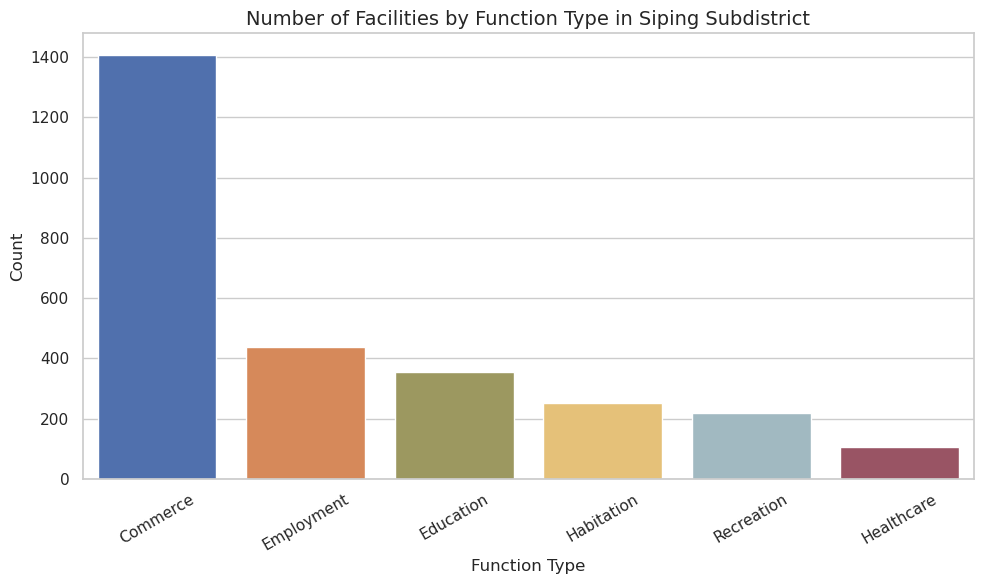

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categories to be excluded
exclude_types_en = ['Transport Facility', 'Passage Facility', 'Others']

# Filtering: retaining only the six core functional types
df_filtered = df[~df['function_type_en'].isin(exclude_types_en)]

# Setting the style
morandi_distinct_palette = [
    '#406BBC',  
    '#EB8445',  
    '#A6A056',  
    '#F7C767',  
    '#9CBCC6',  
    '#A4485E'   
]

# Settings Histogram
fig = plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='function_type_en',
    order=df['function_type_en'].value_counts().index,
    palette=morandi_distinct_palette[:6]
)
plt.title("Number of Facilities by Function Type in Siping Subdistrict", fontsize=14)
plt.xlabel("Function Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
# Save image
fig.canvas.draw()
plt.savefig("Number of Facilities by Function Type in Siping Subdistrict.png", dpi=300)

plt.show()

# Make six facility maps

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point
import os

In [ ]:
# Correspondence between file name and English title of function type
function_dict = {
    "poi_by_function/siping_居住.csv": "Habitation",
    "poi_by_function/siping_就业.csv": "Employment",
    "poi_by_function/siping_商业.csv": "Commerce",
    "poi_by_function/siping_医疗.csv": "Healthcare",
    "poi_by_function/siping_教育.csv": "Education",
    "poi_by_function/siping_休闲娱乐.csv": "Recreation"
}

# colour scheme
color_dict = {
    "poi_by_function/siping_居住.csv": "#F7C767",       # Habitation
    "poi_by_function/siping_就业.csv": "#EB8445",       # Employment
    "poi_by_function/siping_商业.csv": "#406BBC",       # Commerce
    "poi_by_function/siping_医疗.csv": "#A4485E",       # Healthcare
    "poi_by_function/siping_教育.csv": "#A6A056",       # Education
    "poi_by_function/siping_休闲娱乐.csv": "#9CBCC6"     # Recreation
}

# Automatic traversal of each file for plotting
for file in function_dict.keys():
    # Loading data
    df = pd.read_csv(file)
    
    # create GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df,
        geometry=[Point(xy) for xy in zip(df['gcj_lng'], df['gcj_lat'])],
        crs="EPSG:4326"
    )
    
    # Conversion to Mercator projection coordinates to fit the base map
    gdf_web = gdf.to_crs(epsg=3857)
    
    # mapping
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_web.plot(
        ax=ax,
        color=color_dict[file],
        markersize=5,
        alpha=0.8,
        label=function_dict[file]
    )
    
    # Add OSM basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels)
    
    # Title and Legend
    ax.set_title(f"{function_dict[file]} Facilities in Siping Subdistrict", fontsize=15)
    ax.set_axis_off()
    plt.legend()

    # Save as PNG file
    out_file = file.replace(".csv", "_map.png")
    plt.savefig(out_file, dpi=300, bbox_inches="tight")
    plt.close()

print("✅ All six facility maps exported with custom titles and colors.")

✅ All six facility maps exported with custom titles and colors.
